In [1]:
# Libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle
import imageio as ig
import copy
import tensorflow as tf

In [2]:
net = cv2.dnn.readNet('yolov4.weights', 'yolov4.cfg')    # yolo Modell laden



In [7]:
def video_analyzer(video):
    
    crops = []
    classes = ["splash"] # Klassen definieren
    cap = cv2.VideoCapture(video) # Video angeben
    while True:
        
        color = [0, 0, 255]
        
        _, display_img = cap.read() # Frame wird entnommen
        try: #sobald keine Frames mehr vorhanden sind --> Schleife beenden
            height, width, _ = display_img.shape
        except AttributeError as e:
            break
        
        img = display_img.copy() #unbearbeitetes Bild um Analyse durchzuführen (z.B: Masken)

        blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0,0,0), swapRB=True, crop=False) # image blob wird generiert für OD
        
        
        # Frame wird durch das NN propagiert
        net.setInput(blob) 
        output_layers_names = net.getUnconnectedOutLayersNames()
        layerOutputs = net.forward(output_layers_names)
        # Variablen für die Detection werden initialisiert
        boxes = []
        confidences = []
        class_ids = []
        
        for output in layerOutputs:
            for detection in output:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > 0.5:
                    center_x = int(detection[0]*width)
                    center_y = int(detection[1]*height)
                    w = int(detection[2]*width)
                    h = int(detection[3]*height)

                    x = int(center_x - w/2)
                    y = int(center_y - h/2)

                    boxes.append([x, y, w, h])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)
                    
        indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4) #Non Max Supression, um endgültige Anzahl an erkannten Objekten zu bekommen

        font = cv2.FONT_HERSHEY_PLAIN # Fontwahl für Textausgabe


        if len(indices) > 0: # Wenn ein Objekt gefunden wurde
            for i in indices.flatten():
                x, y, w, h = boxes[i]

                x, y, w, h = max(x, 0), max(y, 0), min(w, w + x), min(h, h + y) # für den Fall dass BB über dem Frame hinausgehen
                crop_img = img[y: y + h, x: x + w, :] # BB wird aus dem Frame ausgeschnitten und in eine Variable zum Feature Matching gespeichert

                crops.append(crop_img[:])

                bb_size = round(math.sqrt(w*h),2)

                label = str(classes[class_ids[i]])
                confidence = str(round(confidences[i], 2))
                cv2.rectangle(display_img, (x,y), (x+w, y+h), color, 2)
                cv2.putText(display_img, label + " " + confidence, (x, y+20), font, 2, (255,255,255), 2)
                plt.imshow(display_img)
                plt.show()
                    
            #Atas Code
            
            # Iteriere durch crops und speichere die Volumne in einer Liste
            # Am Ende soll der größte Volumenwert ausgegeben werden
            
    print(len(crops))
#     for img in crops:    
#         plt.imshow(img)
#         plt.show()
                    
                    
                    

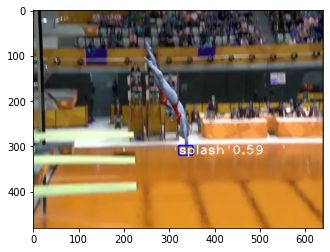

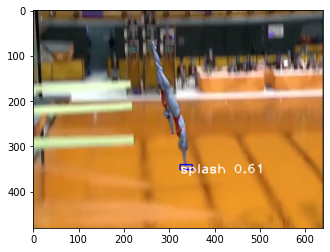

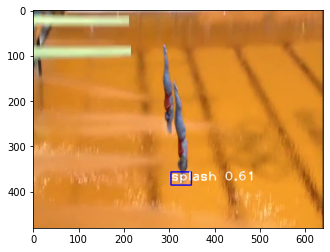

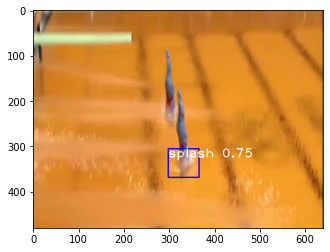

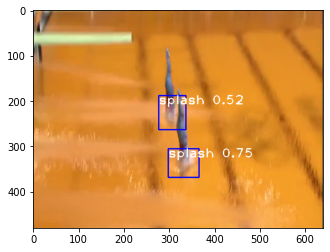

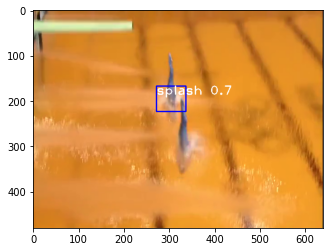

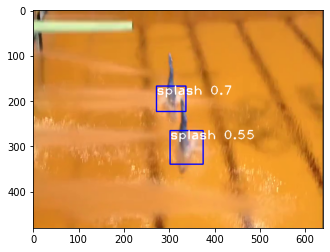

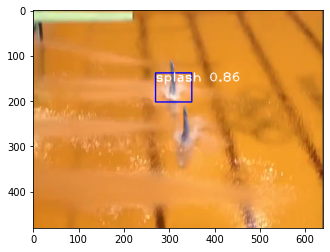

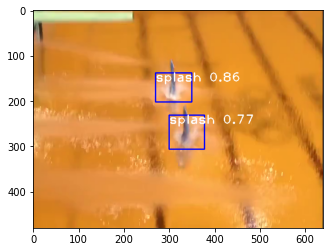

9


In [8]:
vid1 = video_analyzer("/home/dl4/Task2/Videos/_lmT4WlK7G0_00013.mp4")